In [1]:
import disentangler as dt
from disentangler.dependencies import *

atac_data = dt.bonemarrow.utils.load_ATAC_data()

In [2]:
mira_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_ATAC)

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [3]:
np.random.seed(0)
downsample = atac_data[np.random.choice(atac_data.n_obs, size = 10000)]

In [4]:
def entanglement_panel(adata, ax, gene):

    dt.plots.disentanglement_plot(adata, 
        ax[0], gene, 
        palette = sns.color_palette('light:blue', as_cmap=True), 
        size = 1)

    dt.plots.disentanglement_plot(adata, ax[1], gene, 
        color = 'cell_type', 
        palette = list(dt.bonemarrow.colors.CELL_PALETTE.values()), 
        add_legend=False,
        hue_order = list(dt.bonemarrow.colors.CELL_PALETTE.keys()), size = 1)

    dt.plots.disentanglement_plot(adata, ax[2], gene, 
        color = 'batch', 
        palette = list(dt.bonemarrow.colors.BATCH_PALETTE.values()),
        add_legend=False,
        hue_order = list(dt.bonemarrow.colors.BATCH_PALETTE.keys()), 
        size = 1)

    for _ax in np.ravel(ax):
        _ax.set(ylabel = '', yticks = [], xticks = [0], xlabel = '')

    ax[0].set_title(gene)
    ax[1].set_title(None)
    ax[2].set_title(None)

    plt.tight_layout()

In [5]:
mira_model.predict(downsample)

Predicting latent vars:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21, topic_22, topic_23, topic_24
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations


In [6]:
mira_model.impute(downsample)
mira_model.get_batch_effect(downsample)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Imputing features:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added layer: imputed
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Imputing features:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added layer: batch_effect


In [28]:
mira_model.rank_peaks(3)[-30:]

array(['chr14-67943599-67944506', 'chr19-47729788-47730610',
       'chr6-108113204-108114152', 'chr16-11128453-11129256',
       'chrX-40172272-40172788', 'chr1-3618758-3619662',
       'chr19-17791230-17792130', 'chr13-49280855-49281754',
       'chr6-90044622-90045499', 'chr22-37672949-37673577',
       'chrX-48971350-48971952', 'chr19-51702068-51702890',
       'chr2-25290858-25291770', 'chr2-111897757-111898524',
       'chr7-135645091-135645938', 'chr3-195250716-195251499',
       'chr10-22259027-22259891', 'chr4-2646302-2647183',
       'chr1-234881826-234882438', 'chr9-133473961-133474846',
       'chr1-214213785-214214688', 'chr1-204368775-204369636',
       'chr1-2279042-2279857', 'chr1-26163919-26164833',
       'chr20-35166119-35166988', 'chr6-159654287-159655172',
       'chr19-47712994-47713849', 'chr20-18276514-18277417',
       'chr22-41229566-41230442', 'chr8-22918118-22918998'], dtype=object)

[(-2.0, 2.0)]

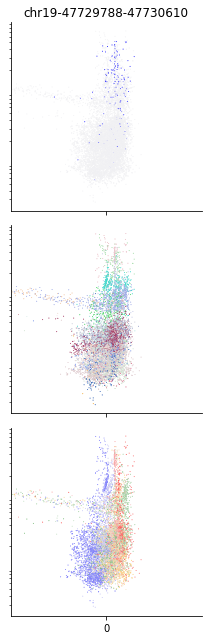

In [32]:
fig, ax = plt.subplots(3,1,figsize=(3,9), sharex=True, sharey=True)
entanglement_panel(downsample, ax, 'chr19-47729788-47730610')
ax[0].set(xlim = (-2,2))#, ylim = (3e-5, 1e-3))
#plt.savefig('figure1/marginal_panels/entangled_MAML2.png')